In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


# blob 2d dataset

In [5]:
n_samples = 1500
np.random.seed(0)
RANDOM_STATE = 170
# varied = datasets.make_blobs(n_samples=n_samples,
#                              cluster_std=[1.0, 2.5, 0.5],
#                              random_state=random_state)
# varied
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
X = StandardScaler().fit_transform(X)

array(['#377eb8', '#ff7f00', '#4daf4a'], dtype='<U7')

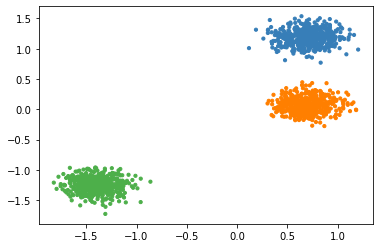

In [6]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
# plt.xlim(-2.5, 2.5)
# plt.ylim(-2.5, 2.5)
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
colors

# Umap

In [7]:
import umap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
%%time
embedding = umap.UMAP(n_neighbors=100, min_dist=1).fit_transform(X)

Wall time: 8.46 s


In [9]:
X
y

array([[ 0.43868549,  1.0189435 ],
       [ 0.39707363,  1.24042045],
       [ 0.66127051,  1.30549689],
       ...,
       [ 0.74515992,  1.35339121],
       [-1.28031739, -1.22959089],
       [-1.09494672, -1.18028397]])

array([0, 0, 0, ..., 0, 2, 2])

%%time
embedding = umap.UMAP(n_components=2, n_neighbors=15, min_dist=1, random_state=RANDOM_STATE).fit_transform(X)

[]

array([0, 0, 0, ..., 0, 2, 2])

array(['#377eb8', '#377eb8', '#377eb8', ..., '#377eb8', '#4daf4a',
       '#4daf4a'], dtype='<U7')

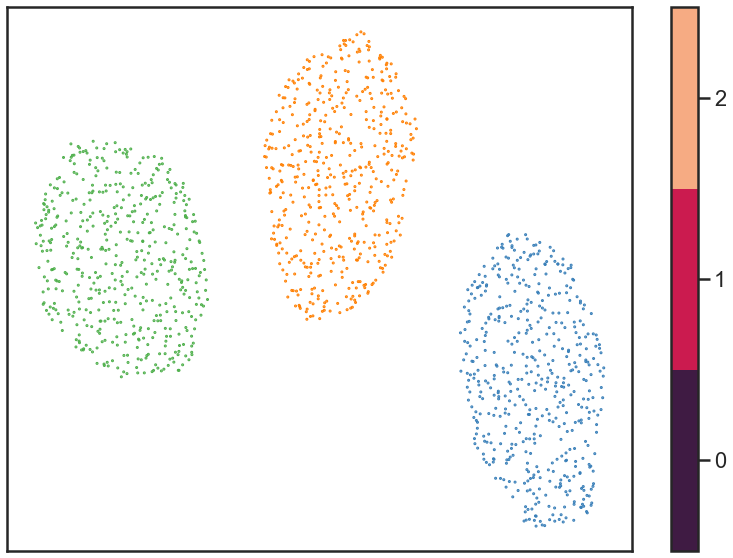

In [12]:
target = np.hstack([y])
sns.set(style='white', context='poster')
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=1, color=colors[y], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(10))
# cbar.set_ticklabels(classes)
# plt.title('Fashion MNIST Embedded via UMAP');
target
colors[y]

# ClusterPlot

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import sys
sys.path.append('../ClusterPlot')
sys.path.append('./utils')

import pandas as pd
import numpy as np
import seaborn as sns
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from DataSetFactory import DataSetFactory
from ClusterPlot_ed1_2d_ex import ClusterPlot

In [25]:
blobs_cp = ClusterPlot(reduce_all_points=False,
                  n_iter=1, 
                  batch_size=0,
                  learning_rate=0.1,
                  dataset='blob_2d',
                  class_to_label=None,
                  show_fig=True,
                  save_fig=False,
                  random_state=RANDOM_STATE,
                  show_inner_blobs=True,
                  show_blobs=True,
                  show_label_level_plots=False,
                  show_anchor_level_plot=False,
                  birch_threshold=0.1,
                  alpha=0.8,
                  douglas_peucker_tolerance= 0.5,
                  smooth_iter=3,
                  magnitude_step=False,
                  show_loss_plot=False,
                  show_anchors=True,
                  show_anchors_annotation=False,
                  show_points=True,
                  uniform_points_per='label',
                  point_margin = 0.001,
                  proximity_k=2,
                  do_relaxation=True
                      )

In [26]:
# blobs_cp._get_intra_class_anchors(X, y)
# blobs_cp.X_with_centroids = np.concatenate((X, blobs_cp.intra_class_anchors), axis=0)
# blobs_cp.y_with_centroids = np.concatenate((y, blobs_cp.intra_class_anchors_labels))
# blobs_cp.X_with_centroids.shape
# blobs_cp.anchors_indices = [i for i in range(len(blobs_cp.y_with_centroids) - len(blobs_cp.intra_class_anchors_labels),
#                                                  len(blobs_cp.y_with_centroids))]
# blobs_cp._build_knng(blobs_cp.X_with_centroids)
# blobs_cp._dim_reduction()
# blobs_cp.X_with_centroids.shape

In [27]:
blobs_cp.num_clusters_each_label 

[]

2021-10-08 21:09:18,996 - ClusterPlot-15857 - INFO - finding intra class anchors using birch
2021-10-08 21:09:19,122 - ClusterPlot-15857 - INFO - vis_brich_result


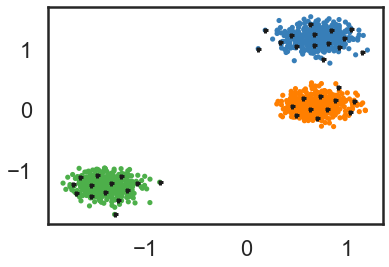

2021-10-08 21:09:19,581 - ClusterPlot-15857 - INFO - UnSupervised Dim Reduction
2021-10-08 21:09:19,582 - ClusterPlot-15857 - INFO - Dim Reduction only anchors
2021-10-08 21:09:21,419 - ClusterPlot-15857 - INFO - Dim Reduction only anchors - generate random points in low dim per label
100%|█████████████████████████████████████████████████████████████████████████████| 1540/1540 [00:08<00:00, 179.04it/s]
2021-10-08 21:09:30,422 - ClusterPlot-15857 - INFO - Starting iteration 1 loss = 0.0


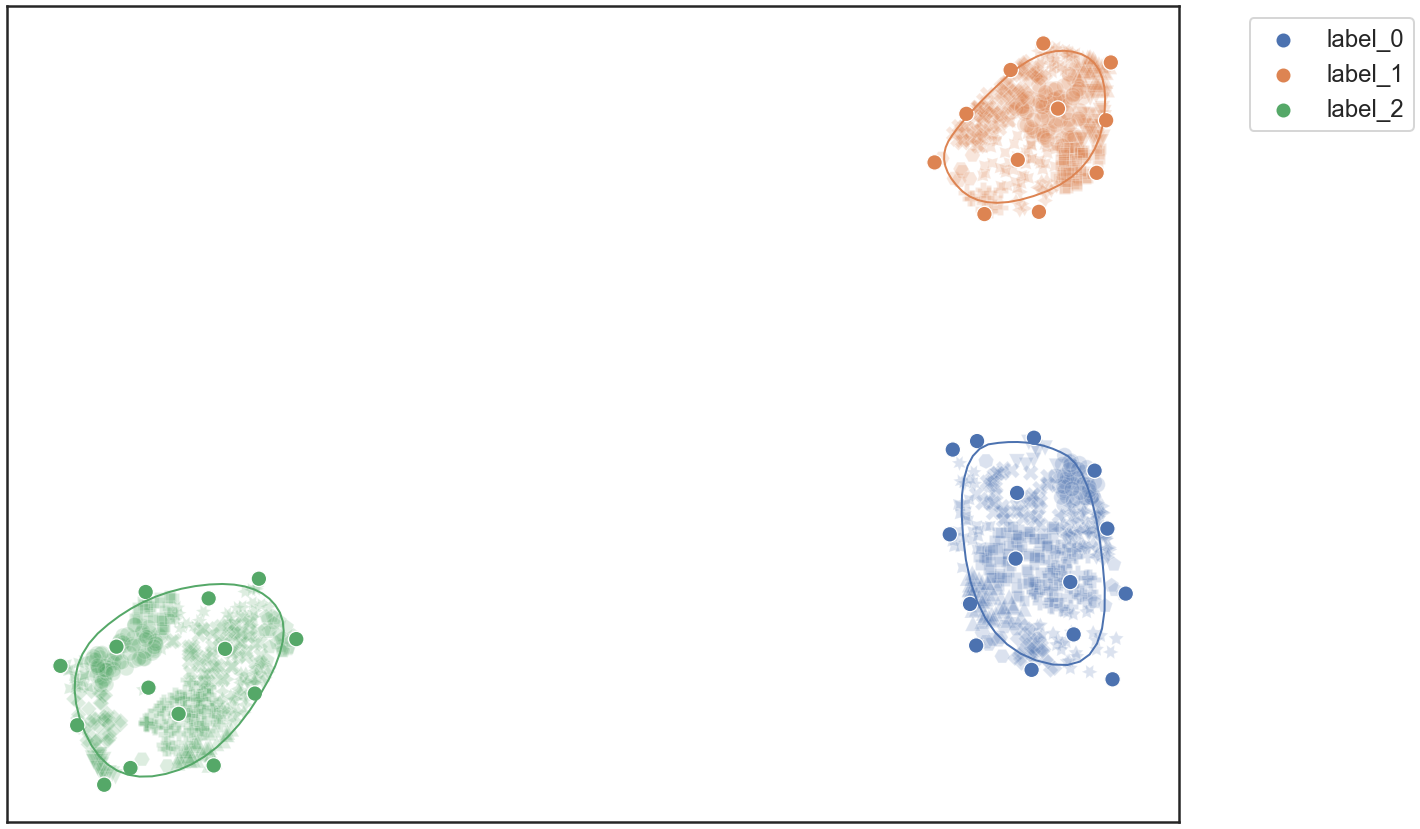

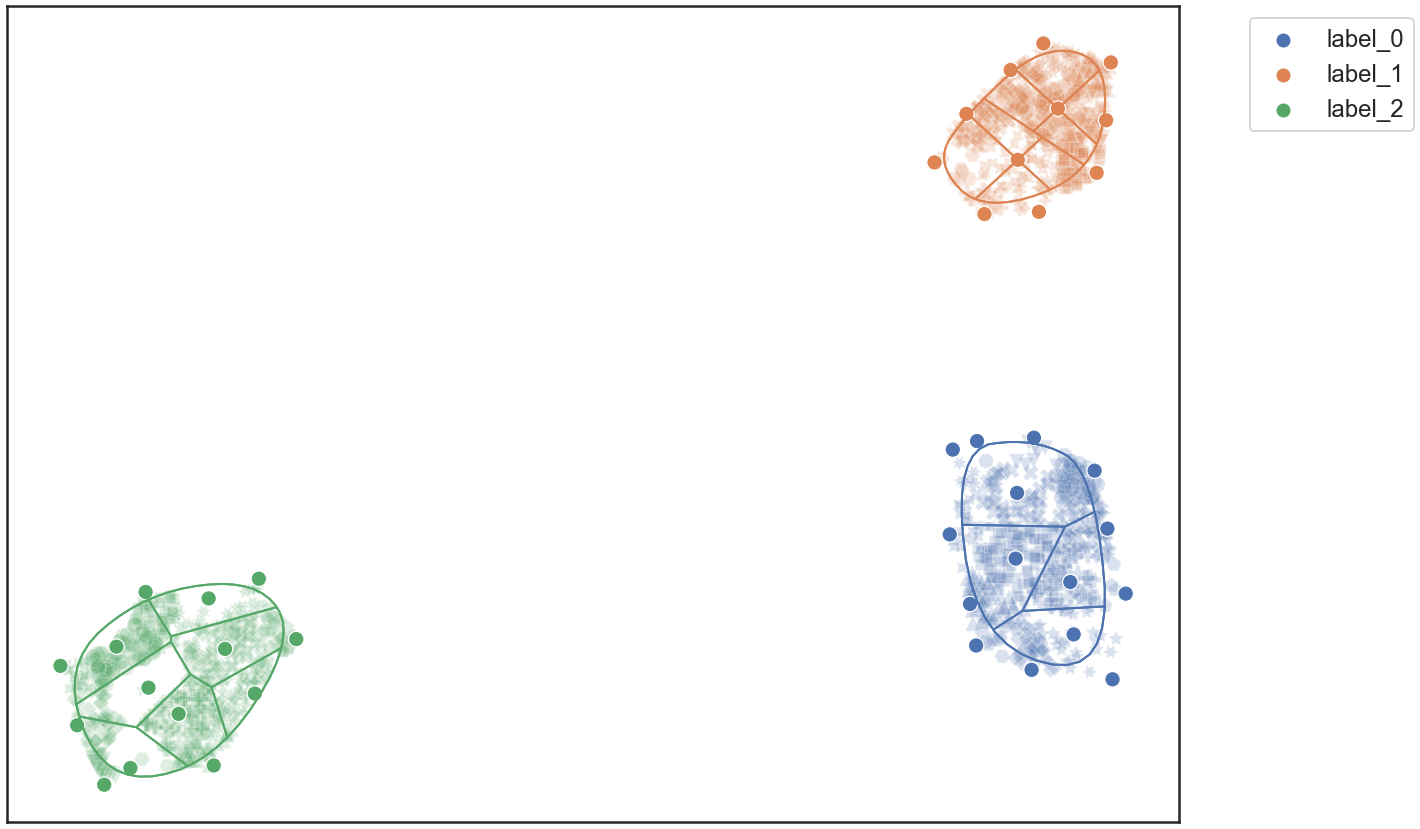

2021-10-08 21:09:31,453 - ClusterPlot-15857 - INFO - 在比较Loss之前绘图
2021-10-08 21:09:31,454 - ClusterPlot-15857 - INFO - loss 0.0 < stopping criteria 1e-05 nothing to do


In [28]:
low_dim_blobs_cp = blobs_cp.fit_transform(X, y)

In [29]:
blobs_cp.vis

,x,y,label,cluster,anchor
0,16.274492,1.327532,label_0,0,False
1,15.888055,1.063503,label_0,1,False
2,15.359625,-0.174249,label_0,2,False
3,15.929699,7.782172,label_1,0,False
4,14.724312,7.348784,label_1,1,False
...,...,...,...,...,...
1535,3.716496,-0.138746,label_2,9,True
1536,1.712189,-3.350612,label_2,10,True
1537,1.993377,-1.987398,label_2,11,True
1538,4.299897,-1.162889,label_2,12,True


,x,y,label
0,16.758097,1.695295,0
1,15.548418,1.317671,0
2,15.525890,0.202654,0
3,16.378551,-0.194246,0
4,15.774855,-1.684723,0
...,...,...,...
195,3.716496,-0.139746,2
196,1.712189,-3.351612,2
197,1.993377,-1.988398,2
198,4.299897,-1.163889,2


[]

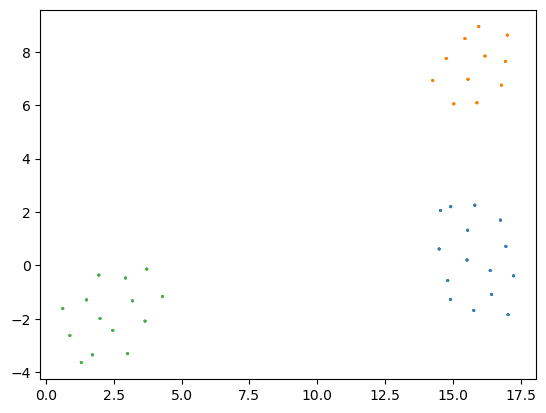

In [30]:
data2 = blobs_cp._get_contour_df()
data2
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
plt.scatter(data2["x"],data2["y"], s=1, color=colors[data2["label"]], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])

# Birch

In [12]:
from sklearn.cluster import Birch
from scipy.spatial import ConvexHull
import alphashape
# from descartes import PolygonPatch


In [18]:
n_samples = 1500
np.random.seed(0)
RANDOM_STATE = 170
# varied = datasets.make_blobs(n_samples=n_samples,
#                              cluster_std=[1.0, 2.5, 0.5],
#                              random_state=random_state)
# varied
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
X = StandardScaler().fit_transform(X)


In [19]:
birch_models = Birch(threshold=0.1, n_clusters=None, branching_factor=X.shape[0])
birch_models.fit(X)
center = birch_models.subcluster_centers_
center.shape

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

(40, 2)

In [20]:
from descartes import PolygonPatch
def vis_birch_result(X, y, center):
    # self._vis_origin_data(X,y)
    fig, ax = plt.subplots()
    colors_dim = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
    ax.scatter(X[:, 0], X[:, 1], s=10, color=colors_dim[y])
    centroids = center
    ax.scatter(centroids[:,0], centroids[:,1], marker='+',
               c='k', s=25)

    return ax
# 凸包
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)   # 画多边形
    ax.add_patch(poly)  # 将图形添加到图中
# Alpha Shape
def encircleAlpha(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    alpha = alphashape.optimizealpha(p)
    alpha
    alpha_shape = alphashape.alphashape(p,alpha)
    ax.add_patch(PolygonPatch(alpha_shape, alpha=.2))

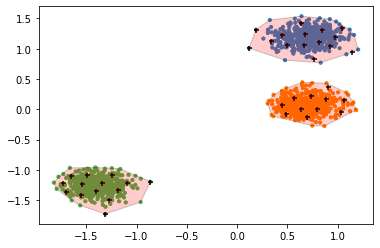

In [21]:
ax = vis_birch_result(X,y,center)
df = pd.DataFrame(X)
df['y'] = y
for i in np.unique(y):
    df1 = df[df['y']==i]
    encircle(df1[0],df1[1],ec="k", fc="red", alpha=0.2)

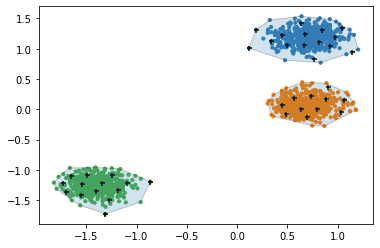

In [22]:
ax = vis_birch_result(X,y,center)
df = pd.DataFrame(X)
df['y'] = y
for i in np.unique(y):
    df1 = df[df['y']==i]
    encircleAlpha(df1[0],df1[1],ec="k", fc="red")

## Birch_blobs 2d dataset

In [24]:
n_samples = 1500
np.random.seed(0)
RANDOM_STATE = 170
# varied = datasets.make_blobs(n_samples=n_samples,
#                              cluster_std=[1.0, 2.5, 0.5],
#                              random_state=random_state)
# variedbirch_models = Birch(threshold=0.1, n_clusters=None, branching_factor=X.shape[0])
# birch_models.fit(X)
center = birch_models.subcluster_centers_
blobs2 = datasets.make_blobs(n_samples=n_samples, random_state=1000)
X2, y2 = blobs2
X2 = StandardScaler().fit_transform(X2)

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

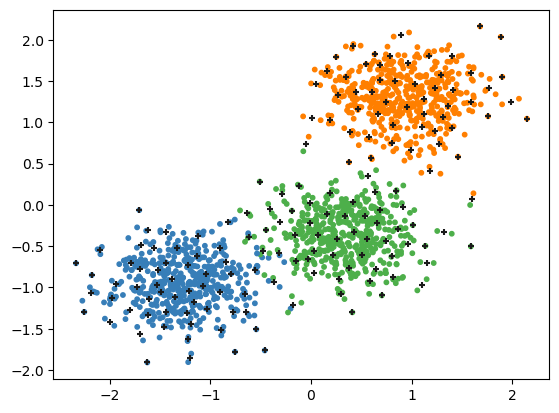

(40, 2)

In [115]:
birch_models = Birch(threshold=0.1, n_clusters=None, branching_factor=X2.shape[0])
birch_models.fit(X2)
center2 = birch_models.subcluster_centers_
vis_birch_result(X2,y2,center2)
center.shape

In [97]:
# X = StandardScaler().fit_transform(X)
# colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
#                                              '#f781bf', '#a65628', '#984ea3',
#                                              '#999999', '#e41a1c', '#dede00']),
#                                       int(max(y) + 1))))
# # plt.xlim(-2.5, 2.5)
# # plt.ylim(-2.5, 2.5)
# plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
# colors

# 比较不同密度数据的不同聚类算法

In [188]:
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

<Figure size 2100x1300 with 0 Axes>

<Figure size 2100x1300 with 0 Axes>

<Figure size 2100x1300 with 0 Axes>

MiniBatchKMeans(n_clusters=3)

'包含cluster_centers的算法有哪些'

array([[ 0.7019784 ,  0.07200405],
       [-1.38935971, -1.2556082 ],
       [ 0.69795223,  1.1760048 ]])

Text(0.5, 1.0, 'MiniBatch\nKMeans')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.03s')

AffinityPropagation(damping=0.9, preference=-200, random_state=0)

'包含cluster_centers的算法有哪些'

array([[ 0.69859294,  1.17475894],
       [-1.40221707, -1.2485549 ],
       [ 0.68413345,  0.07733723]])

Text(0.5, 1.0, 'Affinity\nPropagation')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '5.02s')

MeanShift(bandwidth=0.41584357518468007, bin_seeding=True)

'包含cluster_centers的算法有哪些'

array([[-1.39729748, -1.24892888],
       [ 0.68594991,  0.0727301 ],
       [ 0.70416191,  1.17797192]])

Text(0.5, 1.0, 'MeanShift')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.12s')

D:\Download\anaconda\envs\dataScience_copy\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=3)

Text(0.5, 1.0, 'Spectral\nClustering')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.28s')

D:\Download\anaconda\envs\dataScience_copy\lib\site-packages\sklearn\cluster\_agglomerative.py:247: UserWarning:

the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.



AgglomerativeClustering(connectivity=<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 18002 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

Text(0.5, 1.0, 'Ward')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.18s')

D:\Download\anaconda\envs\dataScience_copy\lib\site-packages\sklearn\cluster\_agglomerative.py:502: UserWarning:

the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.



AgglomerativeClustering(affinity='cityblock',
                        connectivity=<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 18002 stored elements in Compressed Sparse Row format>,
                        linkage='average', n_clusters=3)

Text(0.5, 1.0, 'Agglomerative\nClustering')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.11s')

DBSCAN(eps=0.3)

Text(0.5, 1.0, 'DBSCAN')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.05s')

OPTICS(min_cluster_size=0.1, min_samples=20)

Text(0.5, 1.0, 'OPTICS')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '1.35s')

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

'子类聚类算法有哪些'

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

Text(0.5, 1.0, 'BIRCH')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.04s')

GaussianMixture(n_components=3)

Text(0.5, 1.0, 'Gaussian\nMixture')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.02s')

MiniBatchKMeans(n_clusters=3)

'包含cluster_centers的算法有哪些'

array([[ 0.90867201,  1.29280278],
       [-1.24557447, -0.92221171],
       [ 0.33491788, -0.38525385]])

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.02s')

AffinityPropagation(damping=0.9, preference=-200, random_state=0)

'包含cluster_centers的算法有哪些'

array([[-1.28567732, -0.92708712],
       [ 0.33057269, -0.37151792],
       [ 0.94708494,  1.33682688]])

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '5.33s')

MeanShift(bandwidth=0.9230206102980615, bin_seeding=True)

'包含cluster_centers的算法有哪些'

array([[-1.25087251, -0.93009321],
       [ 0.33259054, -0.36088064],
       [ 0.92210336,  1.3078442 ]])

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.12s')

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=3)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.21s')

AgglomerativeClustering(connectivity=<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 18064 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.12s')

AgglomerativeClustering(affinity='cityblock',
                        connectivity=<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 18064 stored elements in Compressed Sparse Row format>,
                        linkage='average', n_clusters=3)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.10s')

DBSCAN(eps=0.3)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.02s')

OPTICS(min_cluster_size=0.1, min_samples=20)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '1.36s')

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

'子类聚类算法有哪些'

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.05s')

GaussianMixture(n_components=3)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.02s')

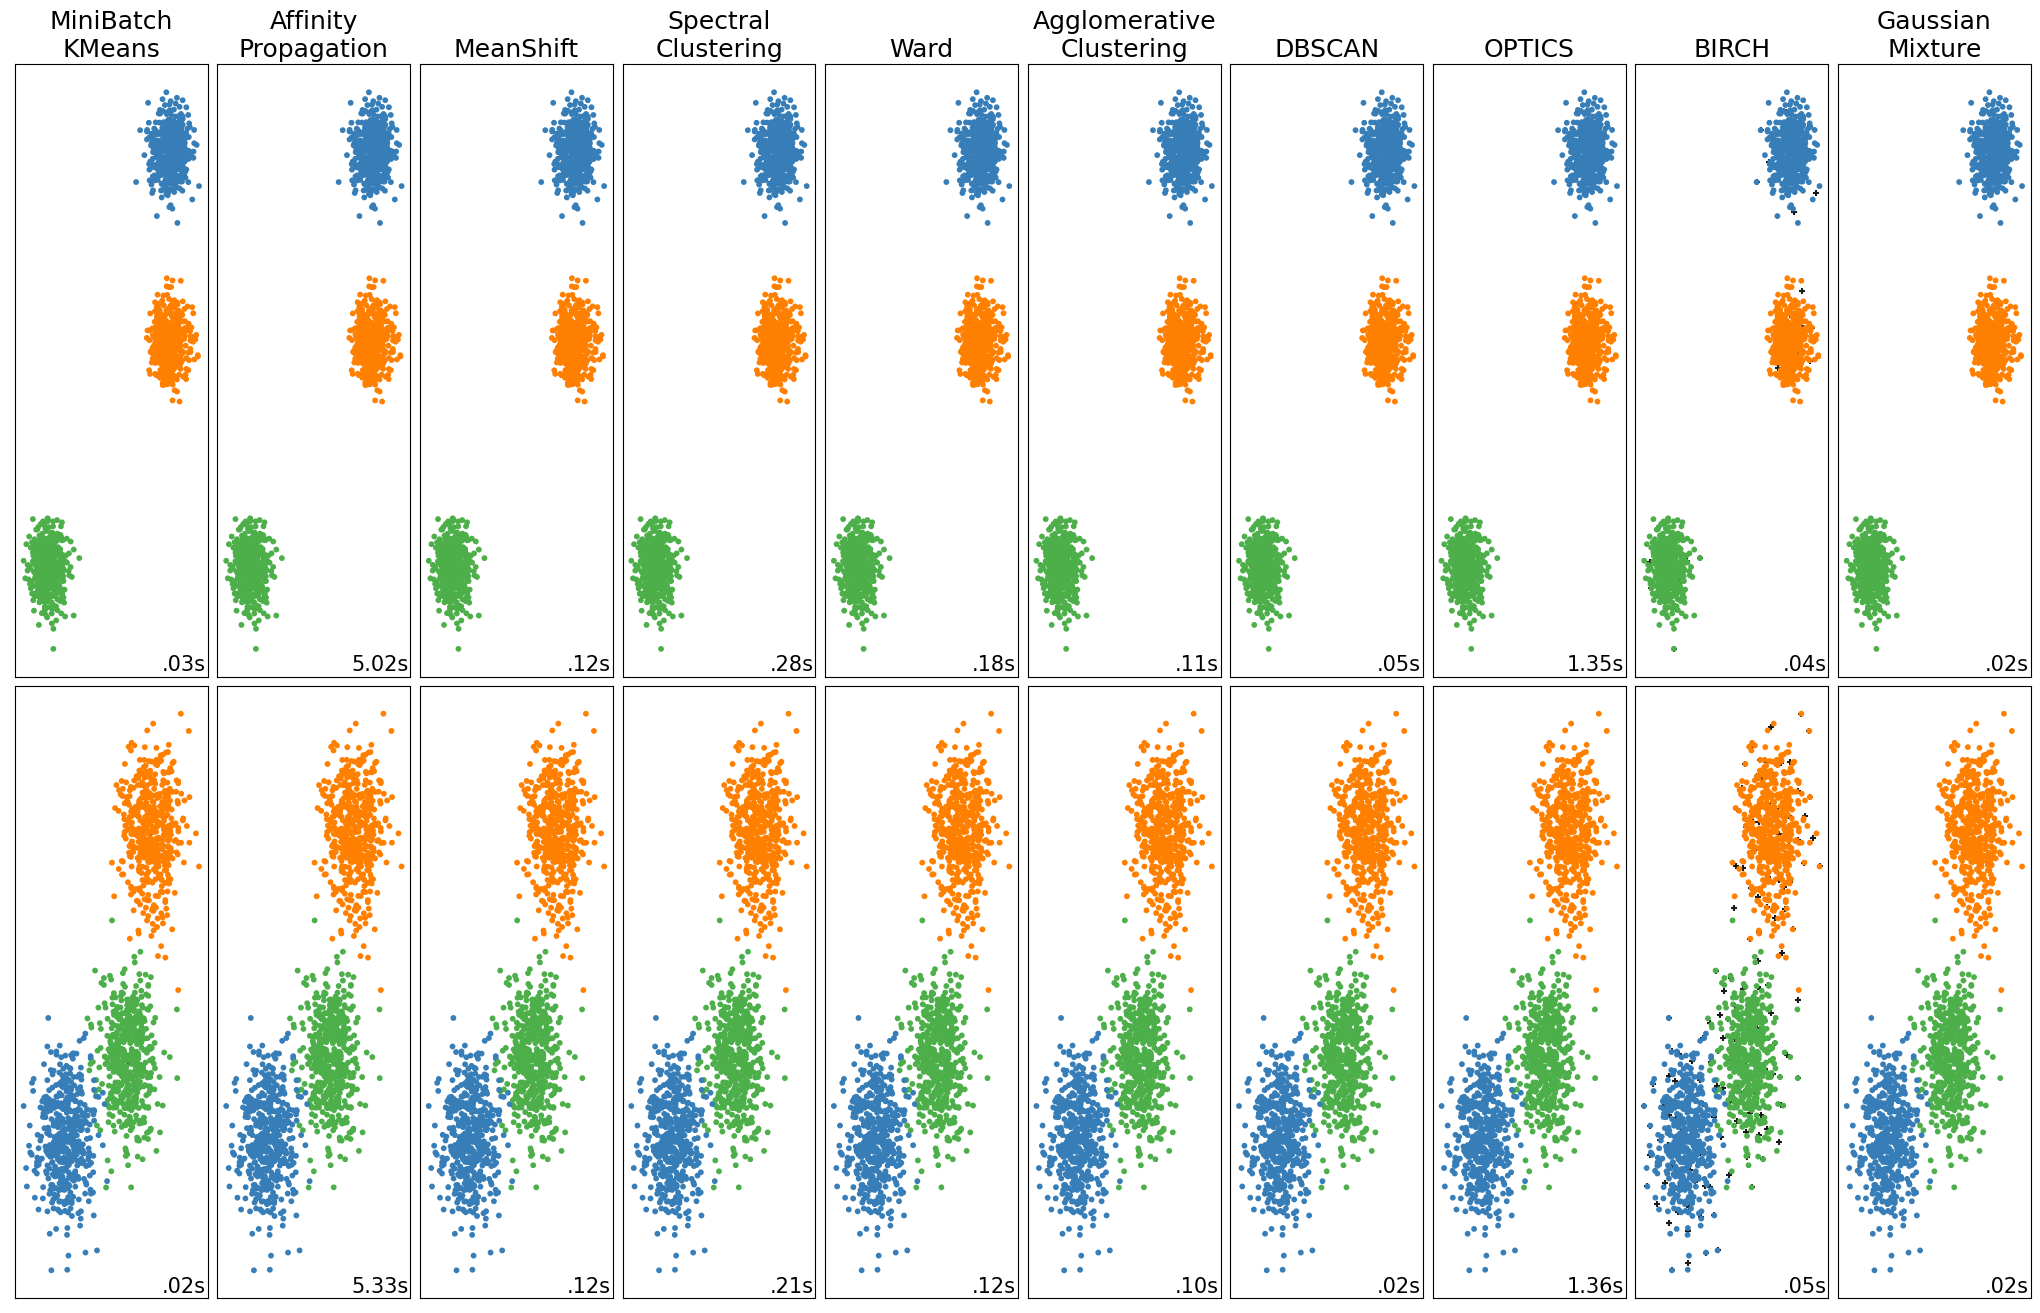

In [230]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.015)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (blobs, {}),
    (blobs2, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'],
        random_state=0)
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(threshold=0.1, n_clusters=None, branching_factor=X.shape[0])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        ('Agglomerative\nClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
#             warnings.filterwarnings(
#                 "ignore",
#                 message="the number of connected components of the " +
#                 "connectivity matrix is [0-9]{1,2}" +
#                 " > 1. Completing it to avoid stopping the tree early.",
#                 category=UserWarning)
#             warnings.filterwarnings(
#                 "ignore",
#                 message="Graph is not fully connected, spectral embedding" +
#                 " may not work as expected.",
#                 category=UserWarning)
            algorithm.fit(X)
                

        t1 = time.time()
#         if hasattr(algorithm, 'labels_'):
#             y_pred = algorithm.labels_.astype(int)
#         else:
#             y_pred = algorithm.predict(X)
        

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if hasattr(algorithm,'subcluster_centers_'):
            centroids = algorithm.subcluster_centers_
            ax=plt.gca()
            plt.scatter(centroids[:,0], centroids[:,1], marker='+',
                   c='k', s=25)
            "子类聚类算法有哪些"
            algorithm
        elif hasattr(algorithm,'cluster_centers_'):
            centroids = algorithm.cluster_centers_
            ax=plt.gca()
            plt.scatter(centroids[:,0], centroids[:,1], marker='+',
                   c='k', s=25)
            "包含cluster_centers"
            algorithm
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])

#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

<Figure size 1512x936 with 0 Axes>

AffinityPropagation(damping=0.9, preference=-200, random_state=0)

'包含cluster_centers的算法有哪些'

array([[ 0.69859294,  1.17475894],
       [-1.40221707, -1.2485549 ],
       [ 0.68413345,  0.07733723]])

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Affinity\nPropagation')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '4.94s')

MeanShift(bandwidth=0.41584357518468007, bin_seeding=True)

'包含cluster_centers的算法有哪些'

array([[-1.39729748, -1.24892888],
       [ 0.68594991,  0.0727301 ],
       [ 0.70416191,  1.17797192]])

array([2, 2, 2, ..., 2, 0, 0], dtype=int64)

Text(0.5, 1.0, 'MeanShift')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.10s')

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

'子类聚类算法有哪些'

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

Text(0.5, 1.0, 'BIRCH')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.04s')

AffinityPropagation(damping=0.9, preference=-200, random_state=0)

'包含cluster_centers的算法有哪些'

array([[-1.28567732, -0.92708712],
       [ 0.33057269, -0.37151792],
       [ 0.94708494,  1.33682688]])

array([1, 1, 2, ..., 2, 1, 0], dtype=int64)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '5.42s')

MeanShift(bandwidth=0.9230206102980615, bin_seeding=True)

'包含cluster_centers的算法有哪些'

array([[-1.25087251, -0.93009321],
       [ 0.33259054, -0.36088064],
       [ 0.92210336,  1.3078442 ]])

array([1, 1, 2, ..., 2, 1, 0], dtype=int64)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.10s')

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

'子类聚类算法有哪些'

Birch(branching_factor=1500, n_clusters=None, threshold=0.1)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.99, 0.01, '.05s')

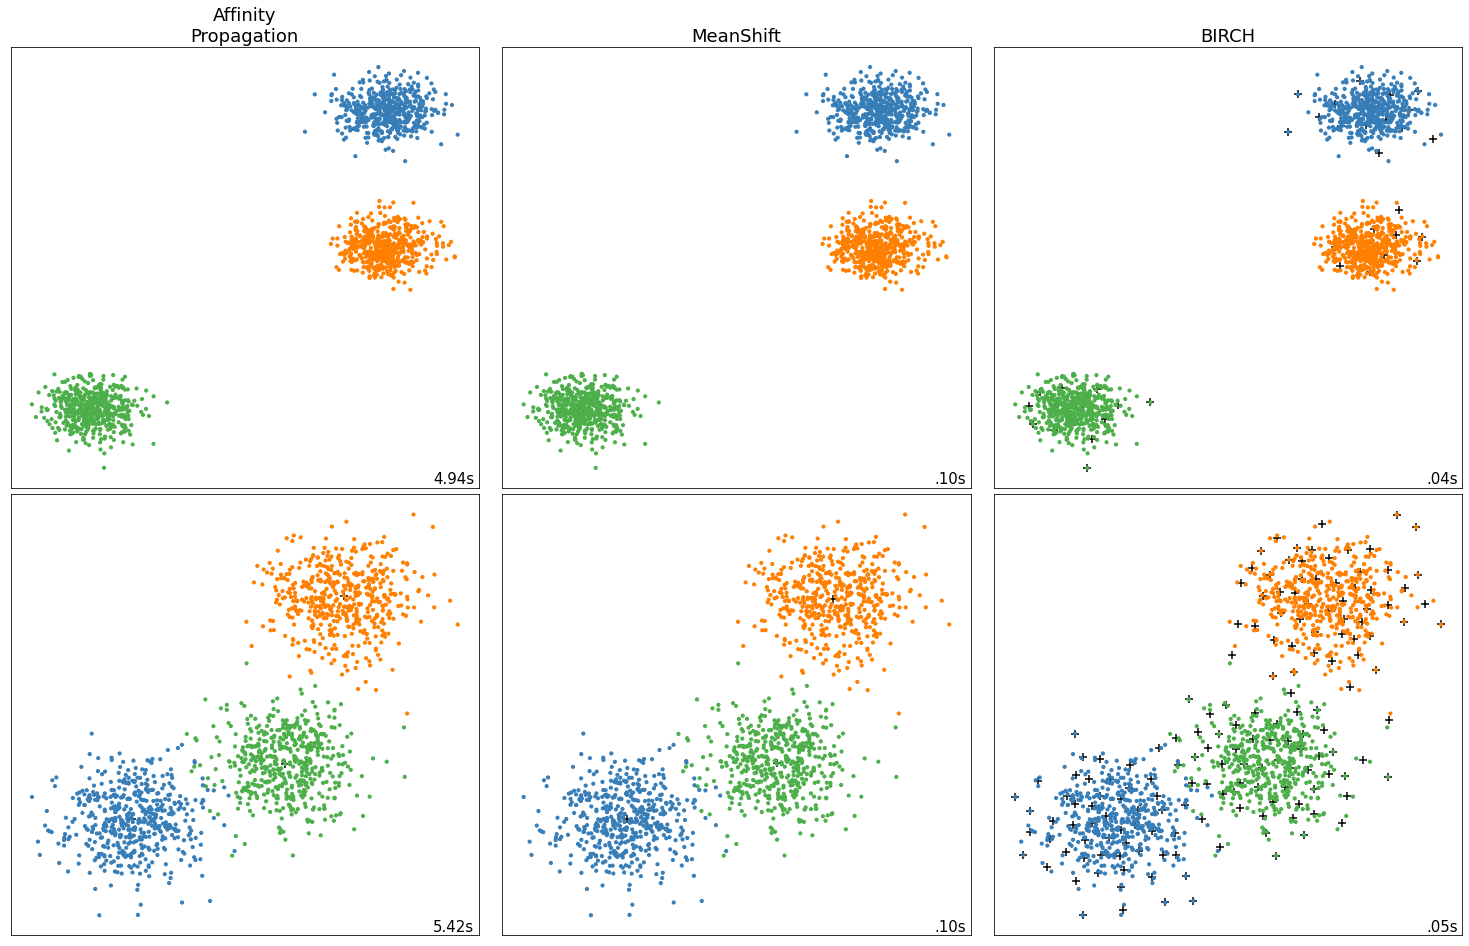

In [25]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.015)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
# origin paramter
# default_base = {'quantile': .3,
#                 'eps': .3,
#                 'damping': .9,
#                 'preference': -200,
#                 'n_neighbors': 10,
#                 'n_clusters': 3,
#                 'min_samples': 20,
#                 'xi': 0.05,
#                 'min_cluster_size': 0.1}

datasets = [
    (blobs, {}),
    (blobs2, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'],
        random_state=0)
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(threshold=0.1, n_clusters=None, branching_factor=X.shape[0])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
#         ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
#         ('Spectral\nClustering', spectral),
#         ('Ward', ward),
#         ('Agglomerative\nClustering', average_linkage),
#         ('DBSCAN', dbscan),
#         ('OPTICS', optics),
        ('BIRCH', birch),
#         ('Gaussian\nMixture', gmm)
    )
    clustering_cluster_center_name = ['cluster_centers_','cluster_centers','subcluster_centers_']

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
#             warnings.filterwarnings(
#                 "ignore",
#                 message="the number of connected components of the " +
#                 "connectivity matrix is [0-9]{1,2}" +
#                 " > 1. Completing it to avoid stopping the tree early.",
#                 category=UserWarning)
#             warnings.filterwarnings(
#                 "ignore",
#                 message="Graph is not fully connected, spectral embedding" +
#                 " may not work as expected.",
#                 category=UserWarning)
            algorithm.fit(X)
                

        t1 = time.time()
#         if hasattr(algorithm, 'labels_'):
#             y_pred = algorithm.labels_.astype(int)
#         else:
#             y_pred = algorithm.predict(X)
        

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if hasattr(algorithm,'subcluster_centers_'):
            centroids = algorithm.subcluster_centers_
            ax=plt.gca()
            plt.scatter(centroids[:,0], centroids[:,1], marker='+',
                   c='k', s=50)
            "子类聚类算法有哪些"
            algorithm
        elif hasattr(algorithm,'cluster_centers_'):
            centroids = algorithm.cluster_centers_
            ax=plt.gca()
            plt.scatter(centroids[:,0], centroids[:,1], marker='+',
                   c='k', s=50)
            "包含cluster_centers的算法有哪些"
            centroids
            algorithm.labels_
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])

#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Birch_blobs 3d dataset

In [ ]:
def vis_scatter_3d(X,y):
    